In [105]:
import csv
import collections
from dateutil.parser import parser
import datetime
import csv
%matplotlib inline
import matplotlib.pyplot as plt

import numpy
import pandas as pd
import seaborn

In [2]:
with open('turnstile_160507.txt') as f:
    turnstiles1 = pd.read_csv(f)
with open('turnstile_160514.txt') as f:
    turnstiles2 = pd.read_csv(f)
with open('turnstile_160521.txt') as f:
    turnstiles3 = pd.read_csv(f)
with open('turnstile_160528.txt') as f:
    turnstiles4 = pd.read_csv(f)

turnstile_df = pd.concat([turnstiles1, turnstiles2, turnstiles3, turnstiles4], ignore_index = True)

In [3]:
turnstile_df.columns = turnstile_df.columns.str.strip()
turnstile_df['DATETIME'] = turnstile_df['DATE'] + ' ' + turnstile_df['TIME']
turnstile_df['DATETIME'] = turnstile_df['DATETIME'].apply(parser)


In [4]:
#THIS STEP TAKES FOREVER!!!!!
m =turnstile_df['DATE']

turnstile_df['dayofweek'] = pd.to_datetime(m).dt.dayofweek


In [117]:
turnstile_df['STATIONLINE'] = turnstile_df['STATION'] + turnstile_df['LINENAME']

In [316]:
turnstile_df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,net_in,net_out,net_sum,STATIONLINE
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941.0,1909983.0,<dateutil.parser.parser object at 0x107170d90>,5.0,NaN,NaN,NaN,59 STNQR456
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991.0,1909993.0,<dateutil.parser.parser object at 0x115a7d350>,5.0,50.0,10.0,60.0,59 STNQR456
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014.0,1910024.0,<dateutil.parser.parser object at 0x115a7d3d0>,5.0,23.0,31.0,54.0,59 STNQR456
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158.0,1910134.0,<dateutil.parser.parser object at 0x115a7d310>,5.0,144.0,110.0,254.0,59 STNQR456
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454.0,1910197.0,<dateutil.parser.parser object at 0x115a7d450>,5.0,296.0,63.0,359.0,59 STNQR456


In [119]:
test =turnstile_df.groupby(['STATIONLINE', 'C/A', 'UNIT', 'SCP'])

In [120]:
turnstile_df['net_in'] = test['ENTRIES'].transform(pd.Series.diff)
turnstile_df['net_out'] = test['EXITS'].transform(pd.Series.diff)

In [121]:
foo = turnstile_df['net_in']
print len(foo[foo>5000])
print len(foo[foo<-5000])

52
64


In [317]:
turnstile_df[turnstile_df['net_in']>5000] = numpy.nan
turnstile_df[turnstile_df['net_in']<-5000] = numpy.nan
turnstile_df['net_in']=numpy.abs(turnstile_df['net_in'])
turnstile_df[turnstile_df['net_out']>5000] = numpy.nan
turnstile_df[turnstile_df['net_out']<-5000] = numpy.nan
turnstile_df['net_out']=numpy.abs(turnstile_df['net_out'])
turnstile_df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,net_in,net_out,net_sum,STATIONLINE
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941.0,1909983.0,<dateutil.parser.parser object at 0x107170d90>,5.0,NaN,NaN,NaN,59 STNQR456
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991.0,1909993.0,<dateutil.parser.parser object at 0x115a7d350>,5.0,50.0,10.0,60.0,59 STNQR456
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014.0,1910024.0,<dateutil.parser.parser object at 0x115a7d3d0>,5.0,23.0,31.0,54.0,59 STNQR456
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158.0,1910134.0,<dateutil.parser.parser object at 0x115a7d310>,5.0,144.0,110.0,254.0,59 STNQR456
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454.0,1910197.0,<dateutil.parser.parser object at 0x115a7d450>,5.0,296.0,63.0,359.0,59 STNQR456


In [318]:
turnstile_df['net_sum']= turnstile_df['net_in']+ turnstile_df['net_out']

In [319]:
turnstile_df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,net_in,net_out,net_sum,STATIONLINE
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941.0,1909983.0,<dateutil.parser.parser object at 0x107170d90>,5.0,NaN,NaN,NaN,59 STNQR456
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991.0,1909993.0,<dateutil.parser.parser object at 0x115a7d350>,5.0,50.0,10.0,60.0,59 STNQR456
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014.0,1910024.0,<dateutil.parser.parser object at 0x115a7d3d0>,5.0,23.0,31.0,54.0,59 STNQR456
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158.0,1910134.0,<dateutil.parser.parser object at 0x115a7d310>,5.0,144.0,110.0,254.0,59 STNQR456
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454.0,1910197.0,<dateutil.parser.parser object at 0x115a7d450>,5.0,296.0,63.0,359.0,59 STNQR456


In [125]:
daily_entry = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_in'].sum()
daily_exit = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_out'].sum()
daily_total = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_sum'].sum()

In [126]:
daily_entry = daily_entry.reset_index()
daily_exit = daily_exit.reset_index()
daily_total = daily_total.reset_index()

In [127]:
total_entry = turnstile_df.groupby(['STATIONLINE'])['net_in'].sum()
total_exit = turnstile_df.groupby(['STATIONLINE'])['net_out'].sum()

In [128]:
total = total_entry.add(total_exit)
summary = pd.concat([total_entry, total_exit, total], axis=1)

In [129]:
summary.columns = ['total_entry', 'total_exit', 'total_traffic']

In [130]:
summary = summary.reset_index()

In [131]:
topten = summary.sort_values(by = ['total_traffic'], ascending = False).head(10)

In [132]:
toptwenty = summary.sort_values(by = ['total_traffic'], ascending = False).head(20)

In [135]:
list(topten['STATIONLINE'])

['GRD CNTRL-42 ST4567S',
 '34 ST-HERALD SQBDFMNQR',
 'TIMES SQ-42 ST1237ACENQRS',
 '42 ST-PORT AUTHACENQRS1237',
 '34 ST-PENN STAACE',
 '14 ST-UNION SQLNQR456',
 '86 ST456',
 '47-50 STS ROCKBDFM',
 'FLUSHING-MAIN7',
 '59 ST COLUMBUSABCD1']

In [167]:
topstation_name = ['GRD CNTRL-42 ST (4567S)',
 '34 ST-HERALD SQ (BDFMNQR)',
 'TIMES SQ-42 ST (1237ACENQRS)',
 '42 ST-PORT AUTH (ACENQRS1237)',
 '34 ST-PENN STA (ACE)',
 '14 ST-UNION SQ (LNQR456)',
 '86 ST (456)',
 '47-50 STS ROCK (BDFM)',
 'FLUSHING-MAIN (7)',
 '59 ST COLUMBUS (ABCD1)']


In [139]:
topstation = list(topten['STATIONLINE'])

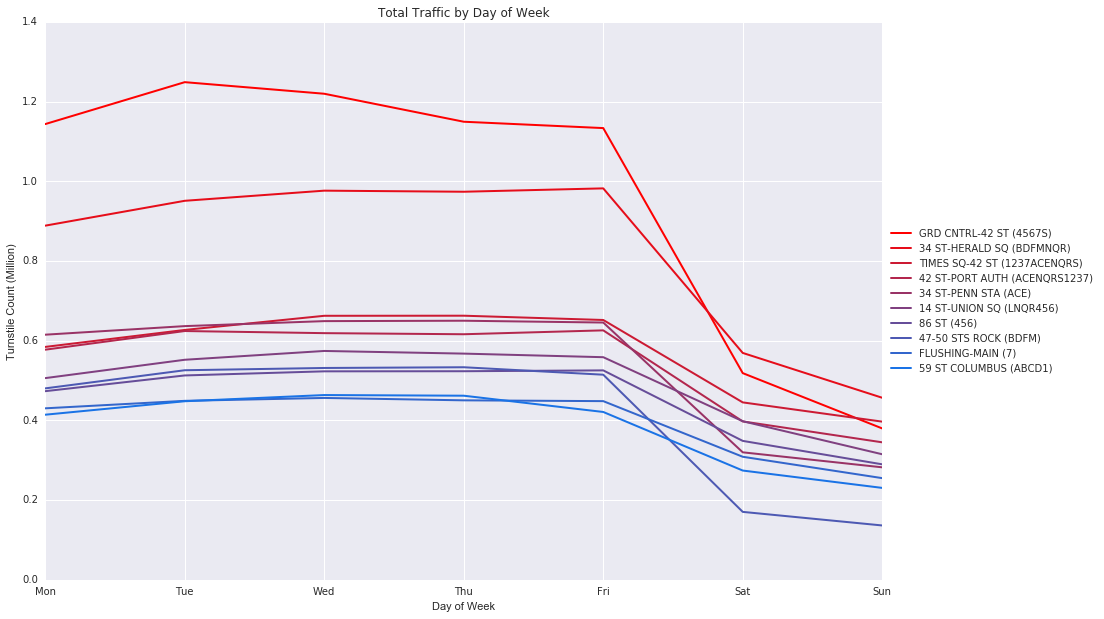

In [168]:
daily_total
fig1 = plt.figure(dpi = 600, figsize = (15, 10))
ax1  = fig1.add_subplot(111)
clr = numpy.arange(0, 1.1, 0.1)

for i in topstation:
    station_total = daily_total[daily_total['STATIONLINE']==i]
    x = numpy.array(station_total['dayofweek'])
    y = numpy.array(station_total['net_sum'])
    index = topstation.index(i)
    c = (clr[10-index], clr[index]/2, clr[index], 1)
    ax1.plot(x,y, label = topstation_name[index], color = c, linewidth = 2.0)
ax1.set_xlabel('Day of Week')
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax1.set_yticklabels(numpy.arange(0.0, 1.6, 0.2))
ax1.set_ylabel('Turnstile Count (Million)')
ax1.set_title('Total Traffic by Day of Week')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


In [142]:
t_en = numpy.array(topten['total_entry'])[::-1]
t = numpy.array(topten['total_traffic'])[::-1]

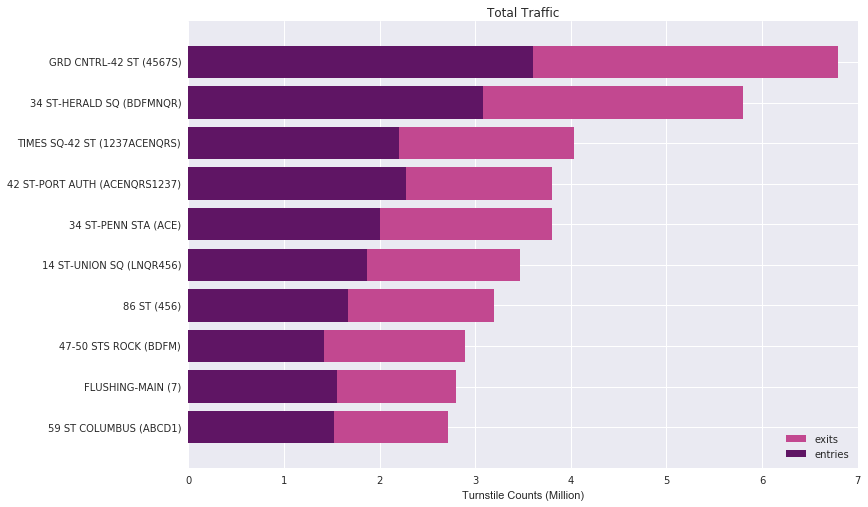

In [169]:
fig2 = plt.figure(dpi = 400, figsize = (12, 8))
ax2  = fig2.add_subplot(111)
ax2.barh(range(0, 10), t, color = '#C24890', label = 'exits', align = 'center', edgecolor = "none")
ax2.barh(range(0, 10), t_en, color = '#5F1564', label = 'entries', align = 'center', edgecolor = "none")
ax2.set_yticks(range(0,10))
ax2.set_yticklabels(topstation_name[::-1])
ax2.set_xlabel('Turnstile Counts (Million)')
ax2.set_xticklabels(range(0,8))
plt.ylim(-1, 10)
plt.title('Total Traffic')
plt.legend(loc = 'best');
fig2.savefig('Fig1.png')

In [174]:
weekday_data = turnstile_df[turnstile_df['dayofweek']<5]
weekend_data = turnstile_df[turnstile_df['dayofweek']>=5]

In [175]:
weekday_data['st2']=weekday_data['STATIONLINE']
weekend_data['st2']=weekend_data['STATIONLINE']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [176]:
weekday_data_to = weekday_data[weekday_data['st2'].isin(topstation)]
weekend_data_to = weekend_data[weekend_data['st2'].isin(topstation)]

In [298]:
m1 = weekday_data_to['STATIONLINE']
m2 = weekday_data_to['TIME']
m3 = weekday_data_to['net_sum']

w1 = weekend_data_to['STATIONLINE']
w2 = weekend_data_to['TIME']
w3 = weekend_data_to['net_sum']

In [299]:
m_new = pd.concat([m1, m2, m3], axis=1)
n_new = pd.concat([w1, w2, w3], axis=1)

In [300]:
hslot = []
h= []
for i in m_new['TIME']:
    i = str(i)
    hour = int(i[:2])
    if hour == 0 or hour ==1:
        hslot.append(6)
    elif hour > 1 and hour <= 5:
        hslot.append(1)
    elif hour <=9:
        hslot.append(2)
    elif hour <=13:
        hslot.append(3)
    elif hour <=17:
        hslot.append(4)
    elif hour<=21:
        hslot.append(5)
    else:
        hslot.append(6)


In [301]:
gslot = []
g= []
for i in n_new['TIME']:
    i = str(i)
    hour = int(i[:2])
    if hour == 0 or hour ==1:
        gslot.append(6)
    elif hour > 1 and hour <= 5:
        gslot.append(1)
    elif hour <=9:
        gslot.append(2)
    elif hour <=13:
        gslot.append(3)
    elif hour <=17:
        gslot.append(4)
    elif hour<=21:
        gslot.append(5)
    else:
        gslot.append(6)


In [302]:
m_new['hslot'] = hslot

In [277]:
hslot = []
len(hslot)

0

In [303]:
set(list(m_new[m_new['STATIONLINE']=='14 ST-UNION SQLNQR456']['TIME']))

{'01:00:00',
 '05:00:00',
 '09:00:00',
 '09:37:24',
 '09:38:40',
 '09:40:49',
 '09:42:12',
 '09:43:35',
 '13:00:00',
 '17:00:00',
 '21:00:00'}

In [304]:
n_new['gslot'] = gslot

In [306]:
stationbyhour = m_new.groupby(['STATIONLINE', 'hslot'])['net_sum'].sum()

In [307]:
stationbyhour_w = n_new.groupby(['STATIONLINE', 'gslot'])['net_sum'].sum()

In [308]:
stationbyhour= stationbyhour.reset_index()

In [309]:
stationbyhour_w= stationbyhour_w.reset_index()

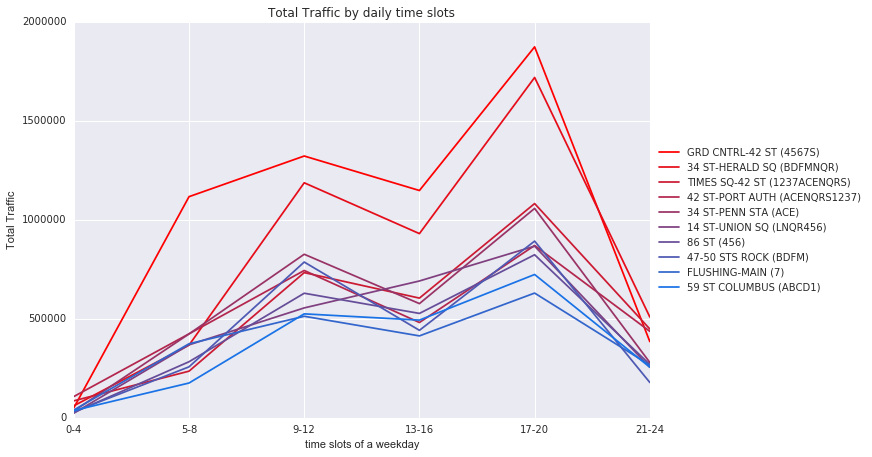

In [311]:
clr = numpy.arange(0, 1.1, 0.1)

fig1 = plt.figure()
ax1 = fig1.add_axes([0, 0, 1, 1])
for i in topstation:
    station_hour = stationbyhour[stationbyhour['STATIONLINE']==i]
    x = numpy.array(station_hour['hslot'])
    y = numpy.array(station_hour['net_sum'])
    index = topstation.index(i)
    c = (clr[10-index], clr[index]/2, clr[index], 1)
    ax1.plot(x,y, label = topstation_name[index], color = c)
ax1.set_xlabel('time slots of a weekday')
ax1.set_xticklabels(['0-4', '5-8', '9-12', '13-16', '17-20', '21-24'])
ax1.set_ylabel('Total Traffic')
ax1.set_title('Total Traffic by daily time slots')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

[1 2 3 4 5 6] [  26416.   47607.  175407.  242221.  233138.  173505.]
[1 2 3 4 5 6] [  43795.   40148.  160501.  280532.  312564.  188353.]
[1 2 3 4 5 6] [  58527.   32324.  116898.  202756.  245138.  186307.]
[1 2 3 4 5 6] [  62406.   44335.  121151.  169753.  196323.  148330.]
[1 2 3 4 5 6] [  22882.   27552.  112691.  159167.  174810.  104935.]
[1 2 3 4 5 6] [  24296.   31869.  134526.  230347.  196685.   95060.]
[1 2 3 4 5 6] [  21375.   24790.  118996.  188979.  182271.  101821.]
[1 2 3 4 5 6] [ 15812.  15297.  51021.  78959.  89952.  55695.]
[1 2 3 4 5 6] [  19269.   41401.  123506.  136768.  144080.   98727.]
[1 2 3 4 5 6] [  20237.   19029.   87747.  142393.  151576.   83694.]


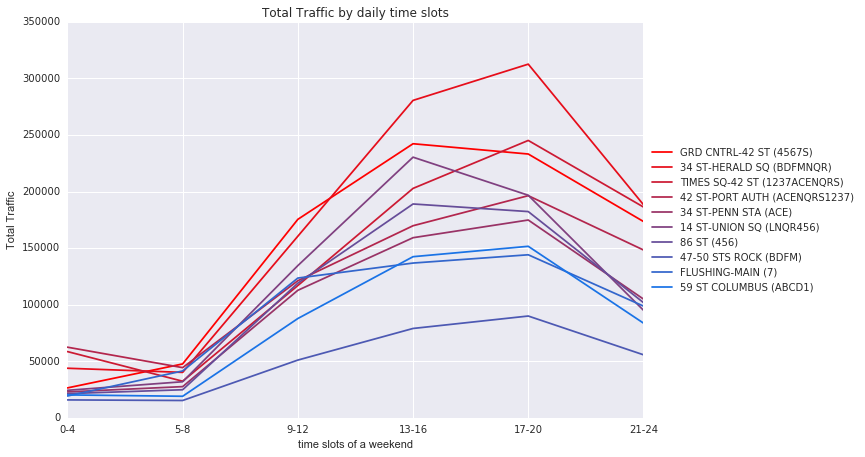

In [312]:
clr = numpy.arange(0, 1.1, 0.1)

fig1 = plt.figure()
ax1 = fig1.add_axes([0, 0, 1, 1])
for i in topstation:
    station_hour = stationbyhour_w[stationbyhour_w['STATIONLINE']==i]
    x = numpy.array(station_hour['gslot'])
    y = numpy.array(station_hour['net_sum'])
    print x, y
    index = topstation.index(i)
    c = (clr[10-index], clr[index]/2, clr[index], 1)
    ax1.plot(x,y, label = topstation_name[index], color = c)
ax1.set_xlabel('time slots of a weekend')
ax1.set_xticklabels(['0-4', '5-8', '9-12', '13-16', '17-20', '21-24'])
ax1.set_ylabel('Total Traffic')
ax1.set_title('Total Traffic by daily time slots')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [287]:
stationbyhour_w

,STATIONLINE,gslot,net_sum
0,14 ST-UNION SQLNQR456,1,24296.0
1,14 ST-UNION SQLNQR456,3,31869.0
2,14 ST-UNION SQLNQR456,4,134526.0
3,14 ST-UNION SQLNQR456,5,230347.0
4,14 ST-UNION SQLNQR456,6,291745.0
5,34 ST-HERALD SQBDFMNQR,1,43795.0
6,34 ST-HERALD SQBDFMNQR,2,39423.0
7,34 ST-HERALD SQBDFMNQR,3,161226.0
8,34 ST-HERALD SQBDFMNQR,4,278168.0
9,34 ST-HERALD SQBDFMNQR,5,314928.0
